# ВВЕДЕНИЕ В ВЫСШУЮ МАТЕМАТИКУ
****************

## Практическое задание к `Уроку 4`

### Задание 1
Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [109]:
import numpy as np
from numpy import (pi,sin,arcsin,cos,arccos,tan,sqrt,exp)
import itertools as it
import math
from math import factorial
import matplotlib.pyplot as plt
import pandas as pd
from pylab import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Рулетка Белое + Черное + зеро = 37/37 (0ю36)
N = 10 # число игр

for i in range(N):
    X = np.random.randint(0,37)
    print(f'Бросок {i+1}: число - {X}')

Бросок 1: число - 21
Бросок 2: число - 16
Бросок 3: число - 15
Бросок 4: число - 3
Бросок 5: число - 21
Бросок 6: число - 0
Бросок 7: число - 17
Бросок 8: число - 4
Бросок 9: число - 9
Бросок 10: число - 15


### Задание 2
- 1)	Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.



In [3]:
red = [32,19,21,25,34,27,36,30,23,5,16,1,14,9,18,7,12,3]
black = [15,4,2,17,6,13,11,8,10,24,33,20,31,22,29,28,35,26]
zero = [0]

S = len(red) + len(black) + len(zero) # Количество вариантов

P_red = len(red)/S # Вероятность выпадения красного
P_black = len(black)/S # Вероятность выпадения черного
P_zero = len(zero)/S # Вероятность выпадения зеро

print(f'Сумма вероятностей каждого из событий = {P_red + P_black + P_zero}')

Сумма вероятностей каждого из событий = 1.0


In [4]:
# Если бросать на одну рулетку сразу 2 шарика и посчитать вероятность, что оба упадут на красное,
# то будет действовать закон умножения вероятностей

P_double_red = P_red * (P_red - 1/S)

print(f'Вероятность выпадения двух шариков на красное = {P_double_red}')

Вероятность выпадения двух шариков на красное = 0.22352081811541274


- 2)	Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

In [95]:
def make_sum_dataset(size):
    x = []   
    for i in range(size):
        x.append(np.sum(np.random.rand(10))) # Добавляет сумму из 10 случайных чисел к списку, длиной N
    return x

x = make_sum_dataset(10000)

mu = 4.996014746023304, D = 0.8317610368910837, std = 0.9120093403529833


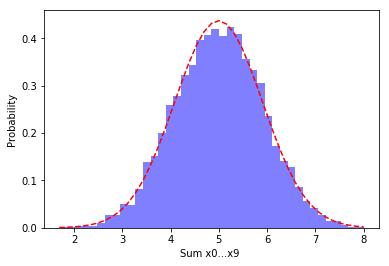

In [96]:
mu = np.mean(x) # Среднее
D = np.var(x) # Дисперсия
std = np.std(x) # Среднеквадратичное отклонение
print(f'mu = {mu}, D = {D}, std = {std}')

num_bins = 40
n, bins, patches = plt.hist(x, num_bins, density=1, facecolor='b', alpha=0.5)
y = mlab.normpdf(bins, mu, std)
plt.plot(bins, y, 'r--')
plt.xlabel('Sum x0...x9 ')
plt.ylabel('Probability')
plt.show()

### Задание 3

- 1)	Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.


Последовательность независимых испытаний:

$\\
P_n(k) = C_n^kp^kq^{n-k}=C_n^k\frac{1}{2^n} \\
C_n^k=\frac{n!}{k!(n-k)!}$

In [107]:
# Используем пример с подбрасыванием монеты

def compute_P(k, n):
    a = np.random.randint(0, 2, n)
    b = np.random.randint(0, 2, n)
    c = np.random.randint(0, 2, n)
    d = np.random.randint(0, 2, n)
    x = a + b + c + d
    for i in range(0, n):
        if x[i] == 2:
            k = k + 1 
    C_n_k = factorial(n)/(factorial(k)*factorial(n-k)) # Расчет вероятности с помощью формулы Бернулли
    Pn_K = C_n_k/2**n
    return k, n, C_n_k, Pn_K

k, n, C_n_k, Pn_K = compute_P(0, 10)
print(f'k = {k}, n = {n},\n- k/n = {k/n},\n- C_n_k = {C_n_k},\n- Pn_k = {C_n_k/2**n}')
print()

k = 4, n = 10,
- k/n = 0.4,
- C_n_k = 210.0,
- Pn_k = 0.205078125



- 2)	Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [114]:
def create_p_dataset(n_0, n_max):
    k, n, C_n_k, Pn_k = [], [], [], []

    for i in range(n_0,n_max):
        k_tmp, n_tmp, C_n_k_tmp, Pn_k_tmp = compute_P(0, i)
        k.append(k_tmp)
        n.append(n_tmp)
        C_n_k.append(C_n_k_tmp)
        Pn_k.append(Pn_k_tmp)
    
    df = pd.DataFrame(n, columns=['n'])
    df['k'], df['Pn_k'], df['C_n_k'] = k, Pn_k, C_n_k
    df['k/n'] = df['k']/df['n']
    return df

In [115]:
df = create_p_dataset(5,501)
df.head()

,n,k,Pn_k,C_n_k,k/n
0,5,4,0.156250,5.0,0.800000
1,6,2,0.234375,15.0,0.333333
2,7,1,0.054688,7.0,0.142857
3,8,1,0.031250,8.0,0.125000
4,9,3,0.164062,84.0,0.333333


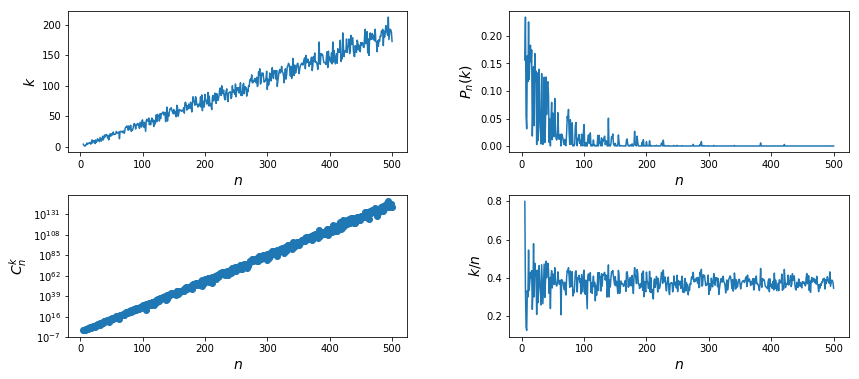

In [126]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.plot(df['n'], df['k'])
ax1.set_xlabel('$n$', fontsize=14)
ax1.set_ylabel('$k$', fontsize=14)

ax2.plot(df['n'], df['Pn_k'])
ax2.set_xlabel('$n$',fontsize=14)
ax2.set_ylabel('$P_n(k)$',fontsize=14)

ax3.scatter(df['n'], df['C_n_k'])
ax3.set_xlabel('$n$',fontsize=14)
ax3.set_ylabel('$C_n^k$',fontsize=14)
ax3.set_yscale('log')

ax4.plot(df['n'], df['k/n'])
ax4.set_xlabel('$n$',fontsize=14)
ax4.set_ylabel('$k/n$',fontsize=14)
# ax4.set_aspect(1)


fig.set_size_inches(14, 6)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

### Задание 4
Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [110]:
text = '9hjk0'
key = 4
d1, d2, d3 = list(it.combinations(text, key)), list(it.permutations(text, key)), list(it.product(text, repeat=key))
print(f'Combinations for \"{text}\", n:{len(text)}, k:{key} = {len(d1)}')
print(f'Permutations for \"{text}\", n:{len(text)}, k:{key} = {len(d2)}')
print(f'Product for \"{text}\", n:{len(text)}, k:{key} = {len(d3)}')

Combinations for "9hjk0", n:5, k:4 = 5
Permutations for "9hjk0", n:5, k:4 = 120
Product for "9hjk0", n:5, k:4 = 625


### Задание 5
Дополните код расчетом коэффициента корреляции x и y по формуле
### $R = \frac{\sum(x_i-x_m)(y_i-y_m)}{\sqrt{\sum(x_i-x_m)^2 \sum (y_i-y_m)^2}}$ 

a = 0.744682681103492, b = 0.1335863671443964
a1 = 0.7446826811034917, b1 = 0.13358636714439678
corr 1 = 0.9203860952988462
corr 2 = [0.9203861 1.       ]


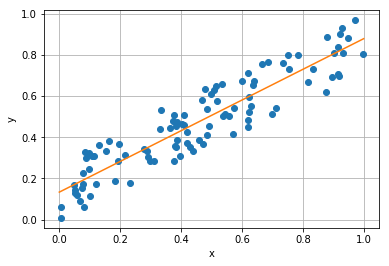

In [111]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r) * np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a* np.sum(x))/n

corr_1 = (np.sum((x-np.mean(x))*(y-np.mean(y))))/sqrt(np.sum((x-np.mean(x))**2)*np.sum((y-np.mean(y))**2))
corr_2 = np.corrcoef(x,y)

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
print(f'a = {a}, b = {b}')
print(f'a1 = {a1}, b1 = {b1}')
print(f'corr 1 = {corr_1}\ncorr 2 = {corr_2[1]}')
plt.plot([0, 1], [b, a + b])
plt.show()